## Capstone Project
## Jumia Phone Price Prediction: Optimizing Retail Strategies through Data Analytics
**Collaborators:** 
>- **Shamla Tadese**
>- **Jeniffer Gatharia**
>- **Ruth Kioko**
>- **Robert Kalafa**
>- **Ilyas Bourzat**
>- **Julliet Mwaura**
* Student Pace:  **DSF-PT07 PART TIME**
* Instructor Name: **SAMUEL G. MWANGI**

![Project Image](images/Black_Friday.jpg)

***
# 1.0 Business Understanding
***

## 1.1 Background
The e-commerce landscape in Africa has witnessed significant growth in recent years with platforms like Jumia leading the charge. As one of the continent's largest online marketplaces, Jumia hosts over 100,000 retailers, all vying for consumer attention in a highly competitive environment. The dynamics of pricing strategy have become increasingly complex, particularly in categories like electronics where demand is sensitive to pricing fluctuations. Retailers must navigate not only the prices set by their competitors but also various factors such as consumer demand, seasonal sales and promotional events.

As the November Black Friday sales event approaches, the pressure intensifies for retailers to optimize their pricing strategies to capture market share while ensuring profitability. However, the traditional methods of price evaluation can be cumbersome and time-consuming, often relying on manual research or outdated tools. This inefficiency can result in missed opportunities for sales and reduced competitiveness.

## 1.2 Problem Statement
Retailers on Jumia are struggling to establish effective pricing strategies due to intense competition and rapidly changing market conditions. Current pricing evaluation methods are slow and lack necessary data-driven insights, which is particularly pressing with Black Friday approaching. To tackle this challenge, we aim to create a predictive pricing model using sales data, competitor pricing and market trends. This model will automate pricing evaluations, allowing retailers to efficiently set competitive prices and improve their performance on the Jumia platform during peak sales periods. Ultimately, the project seeks to equip retailers with essential tools for success in the competitive e-commerce landscape.

## 1.3 Objectives
**Main Objective:** To Develop a predictive model that accurately forecasts the optimal market price of smartphones based on key product features.

Other objectives are;
>- Conduct an in-depth analysis of the dataset to identify key features that impact smartphone pricing on the Jumia platform.
>- Analyze the smartphone market in detail to determine the most dominant smartphone brand on the Jumia platform.

## 1.4 Metric of Success

Developing an optimal model for predicting price (a continuous variable) is a regression problem, so the best model will depend on several factors, including the structure of our data, the relationships between features, and the complexity we are willing to handle.Given the columns available in our dataset (e.g. screen size, RAM, storage, camera, battery power, etc.), different regression models will perform better or worse depending on the nature of the data. Therefore, we will be focusing on the MAE, MSE and R-Squared results as our metrics of gauging success.
A model with lower MSE and MAE while registering R-Squared closer to 1 will be the optimal model.

***
# 2.0 Data Understanding
***

The data for this project was scraped on October 31, 2024, from the Jumia Kenya e-commerce platform, specifically in the smartphones category and organized by popularity from the first to the last page. This process yielded a total of 12,000 listed devices. For a detailed review of the complete code used in the web scraping process, please refer to the following link: [Web Scraping Script](Scrapped_data.ipynb) The packages utilized in this project included Beautiful Soup and Pandas. The extracted [Data](https://github.com/N-kioko/Smartphones_Price_Prediction_and_Discount_Analysis_Project/blob/main/Data/jumia_phones.csv) was saved in CSV format on our local machine as `jumia_phones.csv` and consists of the following features:

* **Name:** This describes the brand and the features of the phone.
* **Price:** This describes the current price the phone retails at.
* **Old Price:** This describes the previous price of the phone.
* **Discount:** The % discount calculated
* **Rating:** The buyers explicit rating of the product and service.
* **Number of Reviews:** The number of reviews from possible buyers.
* **Search Ranking:** The page and position of the product in terms of listing and popularity.

The Name column contains unstructured text, combining brand names and product specifications (e.g. **“Samsung Galaxy A12, 5000mAh, 128GB ROM, 6GB RAM”**). To transform these into separate, structured attributes, we shall use Regex as it allows for consistent pattern matching, enabling the extraction of information such as battery capacity (e.g. numbers followed by "mAh") and storage (e.g. "GB" or "MB"), making data more structured and accessible for analysis.

### Importing the Relevant Libraries

In [71]:
# Import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

### Loading and Inspecting the Dataset

In [2]:
# Loading the dataset
df = pd.read_csv('jumia_phones.csv')
# Checking the first few rows of the dataset
df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [3]:
# Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               12000 non-null  object
 1   Price              12000 non-null  object
 2   Old Price          8101 non-null   object
 3   Discount           8101 non-null   object
 4   Rating             11700 non-null  object
 5   Number of Reviews  11700 non-null  object
 6   Search Ranking     12000 non-null  object
dtypes: object(7)
memory usage: 656.4+ KB


In [4]:
# Summary statistics for numerical columns
df.describe()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
count,12000,12000,8101,8101,11700,11700,12000
unique,40,34,19,22,12,38,12000
top,"Samsung GALAXY A15, 6.5'' HD+, 4GB RAM + 128GB...","KSh 10,000","KSh 29,999",45%,4.3 out of 5,4.6 out of 5(9),"Page 31, Rank 8"
freq,300,1500,1200,900,1800,600,1


### Observations

* Our DataFrame contains seven columns labeled '**Name**', '**Price**', '**Old Price**', '**Discount**', '**Rating**', '**Number of Reviews**' and '**Search Ranking**'
* Each column has a count of 12,000 entries except for Old Price, Discount, Rating and Number of Reviews which have 8,101, 8,101, 11,700 and 11,700 entries respectively. This suggests that there may be missing values in these columns.
* **Most Frequently Listed Product:** XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM) appears 300 times, indicating high popularity among sellers or consumers.
* **Common Price Point:** The most frequent price is KSh 10,000, suggesting a prevalent pricing strategy.
* **Common Discount Rate:** A discount rate of 45% is the most common, likely reflecting promotional tactics.
* **Frequent Rating:** The average rating is "4.3 out of 5," showing that products are generally well-reviewed.
* **Highest Rating Based on Few Reviews** The highest rating is "4.6 out of 5" based on only 9 reviews, indicating a small sample size.
* **Top Search Ranking:** The highest visibility is "Page 1, Rank 1," showcasing a product's prominence in search results.
* **Dominant Trends:** The frequency of certain products and prices suggests prevailing trends in consumer preferences and seller strategies.

***
# 3.0 Data Preparation
***

## 3.1 Data Cleaning

This section focuses on preparing the data for exploratory data analysis (EDA). We intend to:

* Efficiently extract and organize key product attributes/features from the product names column.
* Create a structured DataFrame containing essential details about each phone.
* Examine our dataset and handle null/missing values.
* Extract relevant numerical information from the '**Rating**', '**Number of Reviews**', and '**Search Ranking**' columns of the DataFrame for further analysis.

### Feature Splitting

In [5]:
# Have the Name column in the variable name `product_column`
product_column = 'Name'  

# Define regex pattern to extract brand
pattern_brand = r"(?P<brand>[\w\s]+)(?=\+|,\s|\s|$)"

# Function to extract brand
def extract_brand(name):
    match = re.search(pattern_brand, name)
    return match.group('brand').strip() if match else None

# Extract brand
brand_df = df[product_column].apply(extract_brand).rename('Brand')

# Convert to lowercase and then title case for uniformity
brand_df = brand_df.str.lower().str.title()

# Define regex pattern to extract screen size
screen_size_pattern = r"(?P<screen_size>\d+(\.\d+)?)(?=['\"]{1,2})"

# Function to extract screen size
def extract_screen_size(name):
    match = re.search(screen_size_pattern, name)
    return match.group('screen_size').strip() if match else None

# Extract screen size
size_df = df[product_column].apply(extract_screen_size).rename('Screen Size')

# Define regex pattern to extract RAM
ram_pattern = r"\b(?P<RAM>\d\s?GB)\b"

# Function to extract RAM
def extract_ram(name):
    match = re.search(ram_pattern, name)
    return match.group('RAM').strip() if match else None

# Extract RAM
ram_df = df[product_column].apply(extract_ram).rename('RAM')

# Define regex pattern to extract ROM
rom_pattern = r"\b(?P<ROM>\d{2,}\s?GB)\b"

# Function to extract ROM
def extract_rom(name):
    match = re.search(rom_pattern, name)
    return match.group('ROM').strip() if match else None

# Extract ROM
rom_df = df[product_column].apply(extract_rom).rename('ROM')

# Define regex pattern to extract Color
color_pattern = r"[,-]\s*(?P<Color>([A-Z][a-z]+(?:\s[A-Z][a-z]+)*))\s*(?:\+.*)?(?=\s*\(|$)"

# Function to extract Color
def extract_color(name):
    match = re.search(color_pattern, name)
    return match.group('Color').strip() if match else None

# Extract Color
color_df = df[product_column].apply(extract_color).rename('Color')

# Function to extract features like Warranty
def extract_feature(df, column_name, pattern, feature_name):
    return df[column_name].apply(lambda x: re.search(pattern, x).group(1) if re.search(pattern, x) else None).rename(feature_name)

# Define regex patterns for extracting features
patterns = {
    'Warranty': r"(\d+)\s*(?:YR|WRTY)"  
}
# Extract features using the defined patterns
extracted_features = {
    name: extract_feature(df, product_column, pattern, name)
    for name, pattern in patterns.items()
}
# Special handling for Warranty
extracted_features['Warranty'] = extracted_features['Warranty'].apply(
    lambda x: 2 if x == '2' else (1 if x == '1' else 0)
)
# Function to extract Camera
def extract_camera(name):
    camera_pattern = r'(\d+MP)'
    match = re.search(camera_pattern, name)
    return match.group(1).strip() if match else None

# Extract Camera
camera_df = df[product_column].apply(extract_camera).rename('Camera')

# Function to extract Battery
def extract_battery(name):
    battery_pattern = r'(\d{4}mAh)'
    match = re.search(battery_pattern, name)
    return match.group(1).strip() if match else None

# Extract Battery
battery_df = df[product_column].apply(extract_battery).rename('Battery Power')

# Function to extract Number of SIMs
def extract_sim(name):
    # Regex to check for any form of "dual" (case-insensitive) in the name
    if re.search(r'\b(dual|DUAL)\b', name, re.IGNORECASE):
        return 2  # Return 2 SIMs if "dual" is found
    
    # If "dual" is not found, return 1 SIM by default
    return 1
# Extract SIMs
sim_df = df[product_column].apply(extract_sim).rename('Number of SIMs')

# Add 'Number of SIMs' to the extracted_features dictionary
extracted_features['Number of SIMs'] = sim_df

# Special handling for Number of SIMs
extracted_features['sim_cards'] = extracted_features['Number of SIMs'].apply(
    lambda x: 2 if x and 'Dual' in str(x) else 1
)
# Concatenate extracted features with the original DataFrame (excluding the product column)
extracted_features_df = pd.concat(
    [brand_df, size_df, ram_df, rom_df, color_df, extracted_features['Warranty'], camera_df, battery_df, sim_df],
    axis=1
)
# Concatenate with the original DataFrame, excluding the product column
final_df = pd.concat(
    [extracted_features_df, df.drop(columns=[product_column])],
    axis=1
)
# Display the final DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,None,5000mAh,2,"KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,50MP,5000mAh,1,"KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,Itel S23,6.6,4GB,128GB,Mystery White,1,50MP,5000mAh,2,"KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,0,50MP,5000mAh,2,"KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,Itel S23,6.6,4GB,128GB,Starry Black,0,50MP,5000mAh,2,"KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


**Methodology:**

The above code processes a product dataset (df) to extract key features from the Name column using regex. The features extracted include:
**Brand**, **Screen Size**, **RAM**, **ROM**, **Color**, **Warranty**, **Camera**, **Battery Power**, **Number of SIMs** (based on the presence of "dual").
These extracted features are then combined into a new DataFrame (final_df) alongside the original data.

In [6]:
# Clean the Rating column
final_df['Rating'] = final_df['Rating'].str.extract(r'(\d+\.\d+)')[0]

# Clean the Number of Reviews column to extract the number in parentheses
final_df['Number of Reviews'] = final_df['Number of Reviews'].str.extract(r'\((\d+)\)')[0]

# Define regex pattern to extract page and rank
pattern = r'Page (?P<Page>\d+), Rank (?P<Rank>\d+)'

# Extract page and rank into new columns
final_df[['Page', 'Rank']] = final_df['Search Ranking'].str.extract(pattern)

# Clean up extra spaces in the 'Brand' column
final_df['Brand'] = final_df['Brand'].str.strip().replace(r'\s+', ' ', regex=True)

# Display the cleaned DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,None,5000mAh,2,"KSh 11,000",NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,50MP,5000mAh,1,"KSh 12,925","KSh 15,000",14%,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.6,4GB,128GB,Mystery White,1,50MP,5000mAh,2,"KSh 10,000",NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,0,50MP,5000mAh,2,"KSh 14,000",NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.6,4GB,128GB,Starry Black,0,50MP,5000mAh,2,"KSh 10,000",NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


In [7]:
# Converting data types, handling null values, and checking for duplicates:

# Convert Screen Size and Rating to float
final_df['Screen Size'] = final_df['Screen Size'].astype(float)
final_df['Rating'] = final_df['Rating'].astype(float)

# Convert RAM and ROM to integer
final_df['RAM'] = final_df['RAM'].str.replace('GB', '').astype(int)
final_df['ROM'] = final_df['ROM'].str.replace('GB', '').astype(int)

# Convert Page and Rank to integer
final_df['Page'] = final_df['Page'].astype(int)
final_df['Rank'] = final_df['Rank'].astype(int)

# Convert Price and Old Price to float
final_df['Price'] = final_df['Price'].str.replace(r'[^\d]', '', regex=True).astype(float)
final_df['Old Price'] = final_df['Old Price'].str.replace(r'[^\d]', '', regex=True).astype(float)

# Convert Discount to float
final_df['Discount'] = final_df['Discount'].str.replace('%', '').astype(float)

# Convert the Number of Reviews to integers, filling null values with 0
final_df['Number of Reviews'] = final_df['Number of Reviews'].fillna(0).astype(float).astype(int)

# View the first 6 rows of the modified dataset
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3,64,Midnight Black,2,None,5000mAh,2,11000.0,NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.60,4,128,Gravity Black,1,50MP,5000mAh,1,12925.0,15000.0,14.0,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.60,4,128,Mystery White,1,50MP,5000mAh,2,10000.0,NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.70,4,128,Black,0,50MP,5000mAh,2,14000.0,NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.60,4,128,Starry Black,0,50MP,5000mAh,2,10000.0,NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


In [8]:
# Inspect the shape of the modified DataFrame
final_df_shape = final_df.shape
final_df_shape

(12000, 17)

Our columns after feature splitting is now 17 in number.


In [9]:
# Display information about the DataFrame to confirm its structure and data types
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              12000 non-null  object 
 1   Screen Size        11100 non-null  float64
 2   RAM                12000 non-null  int32  
 3   ROM                12000 non-null  int32  
 4   Color              9600 non-null   object 
 5   Warranty           12000 non-null  int64  
 6   Camera             8700 non-null   object 
 7   Battery Power      9300 non-null   object 
 8   Number of SIMs     12000 non-null  int64  
 9   Price              12000 non-null  float64
 10  Old Price          8101 non-null   float64
 11  Discount           8101 non-null   float64
 12  Rating             10200 non-null  float64
 13  Number of Reviews  12000 non-null  int32  
 14  Search Ranking     12000 non-null  object 
 15  Page               12000 non-null  int32  
 16  Rank               120

In [10]:
# Now that the conversions are complete, let's review the statistical summary of the DataFrame
final_df_stats = final_df.describe()
final_df_stats

,Screen Size,RAM,ROM,Warranty,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Page,Rank
count,11100.000000,12000.000000,12000.000000,12000.000,12000.0000,12000.000000,8101.000000,8101.000000,10200.000000,12000.000000,12000.000000,12000.000000
mean,6.576216,4.500000,128.000000,0.375,1.7750,13735.783250,21325.503024,34.257252,4.297059,79.450000,150.500000,20.500000
std,0.389371,1.870907,61.970316,0.696,0.4176,4733.589395,7141.805533,12.445535,0.292554,89.613708,86.605668,11.543877
min,5.000000,1.000000,32.000000,0.000,1.0000,4700.000000,7499.000000,3.000000,3.500000,0.000000,1.000000,1.000000
25%,6.600000,4.000000,64.000000,0.000,2.0000,10000.000000,14999.000000,24.000000,4.100000,12.500000,75.750000,10.750000
50%,6.600000,4.000000,128.000000,0.000,2.0000,13399.000000,20000.000000,37.000000,4.300000,46.500000,150.500000,20.500000
75%,6.710000,4.000000,128.000000,0.250,2.0000,15661.750000,29999.000000,44.000000,4.500000,117.750000,225.250000,30.250000
max,6.880000,8.000000,256.000000,2.000,2.0000,24999.000000,35000.000000,50.000000,4.800000,420.000000,300.000000,40.000000


### Observations

* **Screen Size:** Most phones have an average screen size of 6.6 inches, with sizes ranging from 5.0 to 6.88 inches.
* **RAM:** 4 GB is the most common RAM, with devices ranging from 1 GB to 8 GB.
* **ROM (Storage):** 128 GB is the standard storage, with some devices offering 32 GB to 256 GB.
* **Warranty:** Majority of phones come with a 1-year warranty, and some with 2 years; a few have no warranty.
* **Price:** Average price is Ksh 13,735, with most phones priced between Ksh 10,000 to Ksh 15,000.
* **Rating:** Phones generally have a high average rating of 4.3, indicating positive user feedback.
* **Number of Reviews:** The average number of reviews is 79, with some phones having hundreds of reviews.
* **Page:** Phones are listed across 1 to 300 pages, suggesting a broad range of devices.
* **Rank:** Phones typically rank between 1 and 30, with few above 40, indicating competitive listings.

This summary highlights that the market is dominated by mid-range devices with standard features (4 GB RAM, 128 GB storage) offered at significant discounts.

In [11]:
# Checking for null values
null_values = final_df.isnull().sum()
null_values

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty                0
Camera               3300
Battery Power        2700
Number of SIMs          0
Price                   0
Old Price            3899
Discount             3899
Rating               1800
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

### Observations

* The most notable missing data includes the **Old Price** and **Discount** columns.
* Moderate Missing Values: **Screen Size**, **Color**, **Camera**, **Battery Power**, and **Rating** have missing values, but they are not as extensive as the above columns.
* No Missing Values: Columns such as **Brand**, **RAM**, **ROM**, **Price**, **Number of Reviews**, **Search Ranking**, **Page**, and **Rank** have no missing values, which are positive for model development as they can be directly used in analysis.

In [12]:
# Fill the null values in the column Old Price with the current price of the phone
final_df['Old Price'] = final_df['Old Price'].fillna(final_df['Price'])

# Calculate the discounts from the Old Price and Current Price
final_df['Discount'] = final_df['Discount'].fillna((final_df['Old Price'] - final_df['Price']) / 100)

# For the Ratings fill 0 as it potentially mean that the product has not yet been rated or shipped.
final_df['Rating'] = final_df['Rating'].fillna(0)

# Check for the null values
final_df.isnull().sum()

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty                0
Camera               3300
Battery Power        2700
Number of SIMs          0
Price                   0
Old Price               0
Discount                0
Rating                  0
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

For rows where the 'Old Price' is missing, it is replaced with the current 'Price'. This assumes that if no previous price is recorded, the current price can serve as a reasonable proxy. This ensures that the 'Old Price' field is populated, allowing for accurate Discount calculations.

Missing values in the 'Rating' column are replaced with 0, indicating that the product may not yet have any ratings or reviews. This approach prevents missing ratings from impacting the analysis or model, while 0 can act as a placeholder until actual ratings are available.

In [13]:
screen_size_skewness = final_df['Screen Size'].skew()
# Print the skewness value

print("Skewness of Screen Size: ", screen_size_skewness)
# Check if the skewness is heavily skewed (assuming threshold of absolute value > 1)
if abs(screen_size_skewness) > 1:
    print("The Screen Size data is heavily skewed.")
else:
    print("The Screen Size data is not heavily skewed.")

Skewness of Screen Size:  -3.523085866613601
The Screen Size data is heavily skewed.


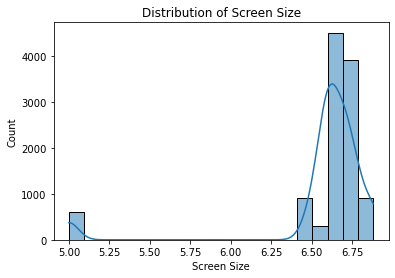

In [14]:
sns.histplot(final_df['Screen Size'], bins=20, kde=True)
plt.title('Distribution of Screen Size')
plt.show()

In [15]:
# Calculate the median of the 'Screen Size' column
screen_size_median = final_df['Screen Size'].median()

# Print the median value
print("Median of Screen Size:", screen_size_median)
screen_size_median = final_df['Screen Size'].median()

# Replace the missing (NaN) values with the calculated median
final_df['Screen Size'] = final_df['Screen Size'].fillna(screen_size_median)

# Verify that there are no missing values
print(final_df['Screen Size'].isnull().sum())

Median of Screen Size: 6.6
0


The Screen Size data is heavily negatively skewed (-3.52), with most values clustering around larger screen sizes and a long tail toward smaller sizes. Due to this skewness, imputing screen size missing values with the median is more appropriate than the mode, as the median better represents the central tendency and avoids the distortion caused by outliers. Using the mode could lead to a misleading imputation, especially in the case of skewed distributions where outliers have a disproportionate effect.

In [16]:
# Replace missing values in 'Color' with 'Unknown'
final_df['Color'] = final_df['Color'].fillna('Unknown')

# Check if missing values were handled
print(final_df['Color'].isnull().sum()) 

0


In [17]:
# Filter rows where Camera is NaN
phones_with_nan_camera = final_df[final_df['Camera'].isna()]

# Count the number of unique brands with NaN Camera
phones_with_nan_camera['Brand'].value_counts()

Xiaomi Redmi 14C       900
Xiaomi Redmi A3        600
Infinix Smart 8        600
Itel A18               300
Oppo A17K              300
Samsung Galaxy A05S    300
Oppo A83 4Gb Ram       300
Name: Brand, dtype: int64

Since the list is small, we'll look up the camera specifications online for these devices and fill in the missing camera values accordingly, rather than removing the entries. A dictionary will be created with phone models and their respective rear camera megapixel values. A function is then defined to check for missing camera values (NaN) and, if found, replace them with the corresponding value from the dictionary based on the phone's brand. This function is applied to the 'Camera' column of the final_df DataFrame to update the missing values.

In [18]:
# Dictionary with phone models and their corresponding rear camera megapixels (numeric only) aquired from the internet
camera_specs = {
    "Xiaomi Redmi 14C": 50,  # 50 MP camera
    "Xiaomi Redmi A3": 13,   # 13 MP camera
    "Infinix Smart 8": 13,   # 13 MP camera
    "Samsung Galaxy A05S": 50,  # 50 MP camera
    "Oppo A83 4Gb Ram": 13,   # 13 MP camera
    "Oppo A17K": 50,          # 50 MP camera
    "Itel A18": 5            # 5 MP camera
}

# Function to replace NaN values with the camera specs from the dictionary (numeric only)
def replace_camera_specs(row):
    if pd.isna(row['Camera']) and row['Brand'] in camera_specs:
        return camera_specs[row['Brand']]
    return row['Camera']

# Apply the function to the 'Camera' column
final_df['Camera'] = final_df.apply(replace_camera_specs, axis=1)

In [19]:
# Check unique values in the 'Camera' column
final_df['Camera'].unique()

# Remove the 'MP' suffix and convert the values to numeric (integer)
final_df['Camera'] = final_df['Camera'].replace(to_replace=r'\D', value='', regex=True).astype(float)

In [20]:
# Check the basic statistics of the Battery Power column
final_df['Battery Power'].describe()

count        9300
unique          6
top       5000mAh
freq         7500
Name: Battery Power, dtype: object

In [21]:
# Use regex to extract only the numeric part from 'Battery Power'
final_df['Battery Power'] = final_df['Battery Power'].str.extract('(\d+)').astype(float)

# Check the count of each unique value in the 'Battery Power' column
battery_power_counts = final_df['Battery Power'].value_counts()

# Display the counts of the unique values in 'Battery Power'
print(battery_power_counts)

5000.0    7500
5160.0     600
3000.0     300
7000.0     300
5057.0     300
2400.0     300
Name: Battery Power, dtype: int64


In [22]:
# Impute missing values with the most frequent value (mode)
final_df['Battery Power'] = final_df['Battery Power'].fillna(final_df['Battery Power'].mode()[0])

In [23]:
# Checking for null values
null_values = final_df.isnull().sum()
null_values

Brand                0
Screen Size          0
RAM                  0
ROM                  0
Color                0
Warranty             0
Camera               0
Battery Power        0
Number of SIMs       0
Price                0
Old Price            0
Discount             0
Rating               0
Number of Reviews    0
Search Ranking       0
Page                 0
Rank                 0
dtype: int64

In [24]:
# Checking for Duplicates
final_df.duplicated().sum()

0

In [25]:
# Display the data types of all columns in the final_df DataFrame
final_df.dtypes

Brand                 object
Screen Size          float64
RAM                    int32
ROM                    int32
Color                 object
Warranty               int64
Camera               float64
Battery Power        float64
Number of SIMs         int64
Price                float64
Old Price            float64
Discount             float64
Rating               float64
Number of Reviews      int32
Search Ranking        object
Page                   int32
Rank                   int32
dtype: object

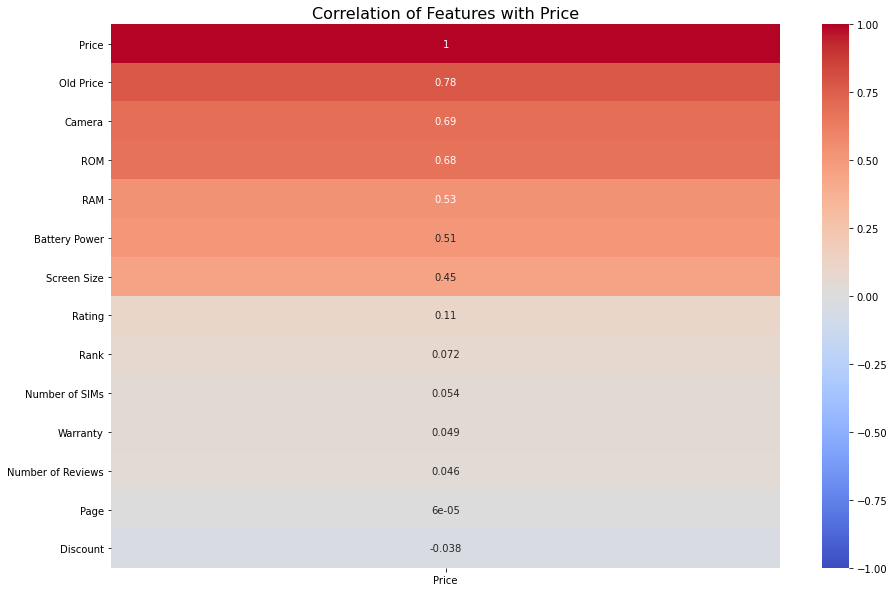

In [26]:
# Plotting a heatmap of correlations, including int32, int64, and float64 columns
correlation_matrix = final_df.select_dtypes(include=['float64', 'int64', 'int32']).corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation of Features with Price', fontsize=16)
plt.show()

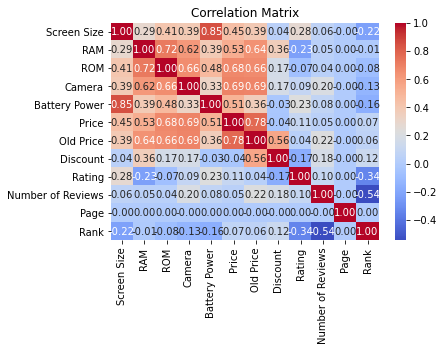

In [27]:
# Heatmap to visualize patterns
# Correlation matrix
final_df_numeric = final_df.select_dtypes(include=[float, int])
correlation_matrix = final_df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Calculate and sort the correlation of numeric columns with 'Price' in descending order
final_df_numeric.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Old Price            0.778953
Camera               0.694238
ROM                  0.676142
RAM                  0.533064
Battery Power        0.509556
Screen Size          0.446941
Rating               0.106853
Rank                 0.071768
Number of Reviews    0.045858
Page                 0.000060
Discount            -0.037581
Name: Price, dtype: float64

### Observations

Based on the dataset, **Old Price**, **Camera**, **ROM**, **RAM** and **Battery Power** are the primary factors influencing price, showing strong positive correlations with it. Specifically, **Old Price** has the highest correlation, followed by **Camera**, **ROM** and **RAM**. Other features, such as **Screen Size**, **Rating**, and **Rank**, show weaker or minimal correlations, suggesting they have a less significant impact on pricing. Features like **Number of Reviews**, **Discount**, and **Page** exhibit very weak or even negative correlations with price, indicating that they are not effective for pricing strategy or analysis.

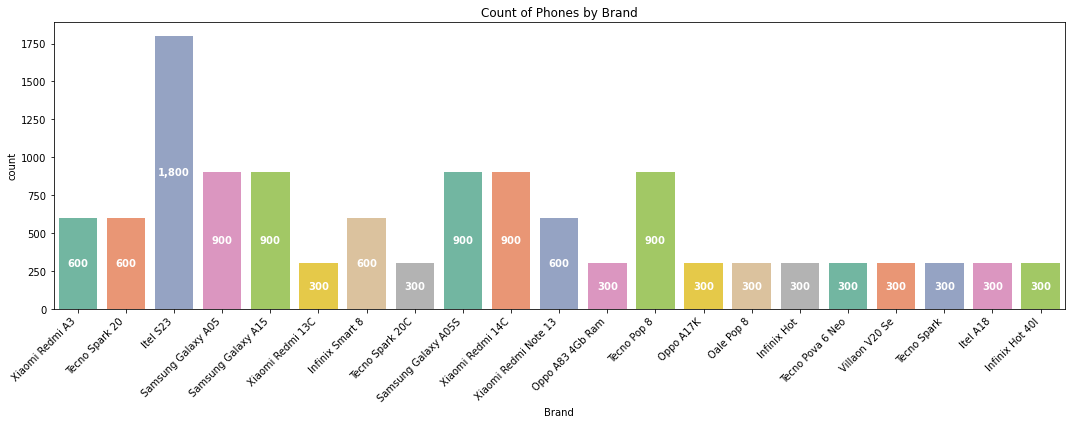

In [ ]:
# Set figure size for the plot
plt.figure(figsize=(15, 6))

# Count plot for 'Brand' column in the dataset, with a custom color palette
ax1 = sns.countplot(x='Brand', data=final_df, palette="Set2")

# Remove the legend (optional)
if ax1.get_legend() is not None:
    ax1.legend_.remove()

# Set the title of the plot
plt.title('Count of Phones by Brand')

# Annotate each bar with its corresponding count value inside the bar
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height()):,}', 
                 (p.get_x() + p.get_width() / 2., p.get_height() / 2),  
                 ha='center', va='center', 
                 color='white', fontsize=10, weight='bold')  

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Automatically adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()


**Summary:** From the above visualization, we note that Itel S23 appears to be the most listed product which could possible imply that this phone is a fast moving product due to demand among customers on the platform followed by Samsung Galaxy A05, XIOMI Redmi 14C, Samsung Galaxy A15 and Tecno POP 8 at a very close range which highlights the competitive landscape in this segment.

**Impact:** These findings could inform inventory decisions and marketing strategies to enhance visibility and sales for these trending products.

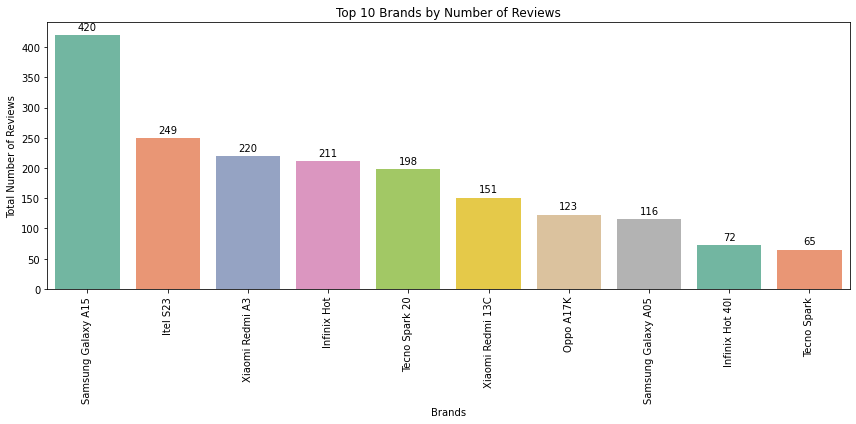

In [ ]:
# Get the top 10 brands by the number of reviews 
mostly_reviewed = final_df.groupby('Brand')['Number of Reviews'].agg('max').nlargest(10)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the barplot using Seaborn without the hue parameter
sns.barplot(x=mostly_reviewed.index, y=mostly_reviewed.values, palette="Set2")

# Add titles and labels
plt.title('Top 10 Brands by Number of Reviews')
plt.xlabel('Brands')
plt.ylabel('Total Number of Reviews')

# Annotate each bar with its corresponding review count
for i, v in enumerate(mostly_reviewed.values):
    plt.text(i, v + 5, f'{int(v):,}', ha='center', va='bottom', fontsize=10, color='black')  

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


**Summary:** Samsung Galaxy A15 leads the platform with over 400 reviews, followed by Itel S23 with around 250. Xiaomi Redmi A3 and Infinix Hot have similar reviews near 200. Other models have fewer, with Tecno Spark the lowest. This possibly suggests higher consumer interest in Samsung Galaxy A15 followed by Itel S23. 

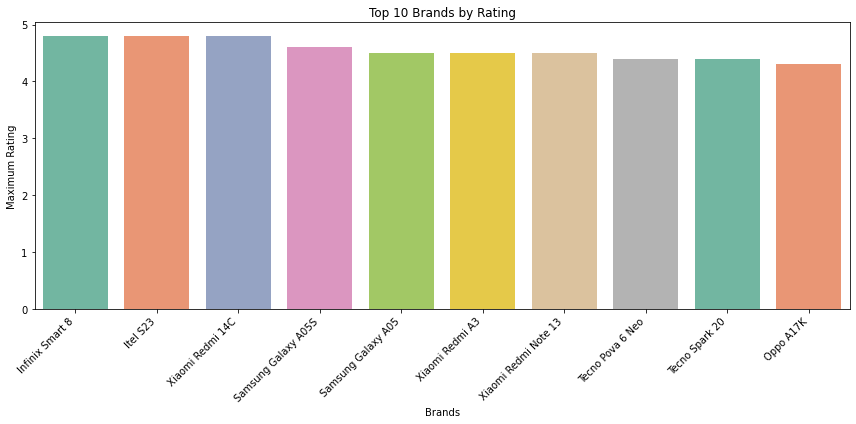

In [ ]:
# Get the top 10 brands by the maximum rating
top_rated = final_df.groupby('Brand')['Rating'].max().nlargest(10)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the barplot
sns.barplot(x=top_rated.index, y=top_rated.values, palette="Set2")

# Add titles and labels
plt.title('Top 10 Brands by Rating')
plt.xlabel('Brands')
plt.ylabel('Maximum Rating')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  

# Automatically adjust layout to avoid clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

This bar plot shows the top 10 smartphone brands by their maximum rating. Each bar represents a specific phone model and its maximum rating on a scale from 0 to 5. All brands shown have a maximum rating close to 5, indicating high customer satisfaction or performance across these top-rated models. This suggests a competitive market where multiple brands deliver high-rated devices.

### Univariate Analysis: Price 

In our context, price is the target variable, and we aim to understand its relationship with other features in the dataset. By exploring correlations between price and attributes such as brand, specifications (like Screen Size, RAM, Battery Power), and ratings, we can uncover patterns that influence pricing. This analysis may reveal insights into factors that drive price differences across brands, helping to identify the most value-driven options and providing a clearer understanding of the pricing dynamics in the smartphone market.

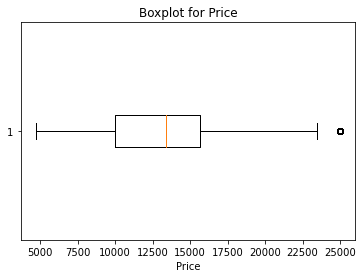

In [42]:
# Finding outliers in the price feature
plt.boxplot(final_df['Price'], vert=False)
plt.xlabel('Price')
plt.title('Boxplot for Price')
plt.show()

This boxplot shows the distribution of smartphone prices, with a median around 13,000 and an interquartile range (IQR) between 10,000 and 15,000. The whiskers capture most data points, while a single outlier above 22,500 likely represents a premium model. Retaining this outlier is valuable, as it provides insight into high-end pricing, which is relevant for understanding market segmentation and customer preferences.

In [43]:
#Top 5 Largest Prices
print(final_df['Price'].nlargest(5))

30     24999.0
70     24999.0
110    24999.0
150    24999.0
190    24999.0
Name: Price, dtype: float64


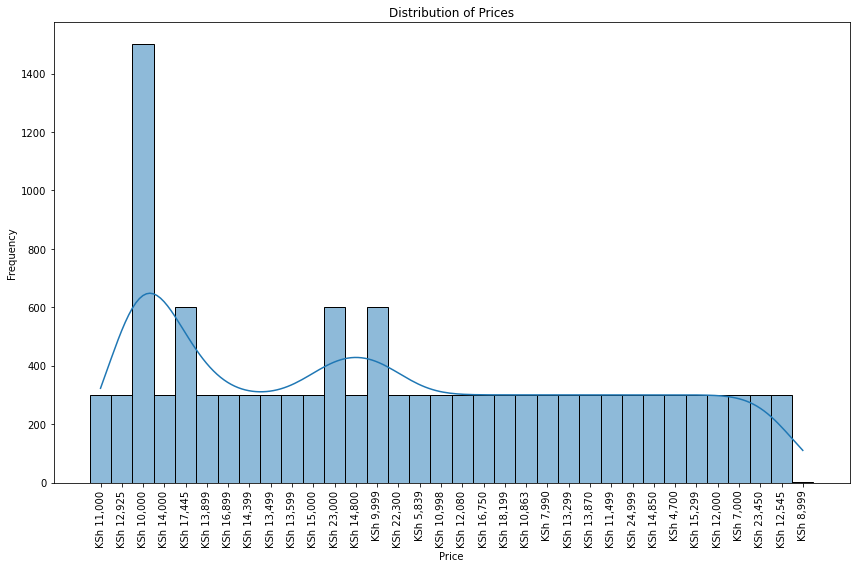

In [46]:
# Visualization of the distribution of Price data from the DataFrame
plt.figure(figsize=(12, 8))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Automatically adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

This histogram shows the distribution of prices with the majority of values clustered around lower price ranges, particularly around Ksh 11,000. There's a significant drop in frequency after this initial peak, with some smaller peaks in the mid-price ranges (around Ksh 13,000–Ksh 17,000) and a gradual decline in frequency as prices increase. The distribution appears right-skewed, indicating that most prices are on the lower end.

### Bivariate Analysis

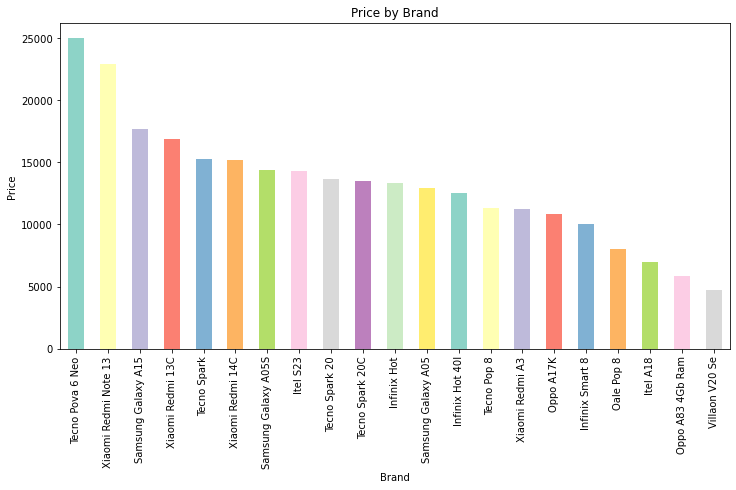

In [48]:
# Group by Brand, calculate average Price, and sort in descending order
brand_price = final_df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Bar plot to visualize the average price for each brand, using a custom color palette
brand_price.plot(kind='bar', color=sns.color_palette("Set3", len(brand_price)))

# Set the title for the plot
plt.title('Price by Brand')

# Label the y-axis as Price
plt.ylabel('Price')

# Display the plot
plt.show()

This bar chart shows the prices of different phone brands. The Tecno Pova 6 Neo is the most expensive, priced at alomost 25,000 Ksh, followed by Xiaomi Redmi Note 13 and Samsung Galaxy A15 at around 20,000 Ksh. Prices generally decline across brands, with Itel A18, Oale Pop 8, and Vilaiom V20 Se being among the most affordable options at prices below 10,000 Ksh.

Using this visualization, one can determine their possible target audience.

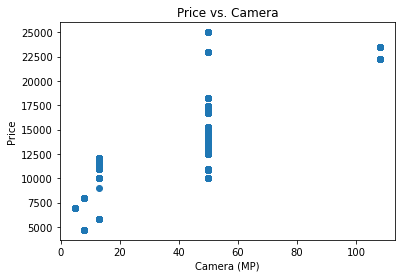

In [49]:
# Scatter plot of Price vs. Camera
plt.scatter(final_df['Camera'], final_df['Price'])
plt.title('Price vs. Camera')
plt.xlabel('Camera (MP)')
plt.ylabel('Price')
plt.show()

The above scatter plot shows the relationship between smartphone camera quality (in MP) and price. Phones with lower-resolution cameras (10-20 MP) are generally priced below 10,000, while mid-range resolutions (40-60 MP) vary widely, from 10,000 to 25,000. High-resolution cameras (above 100 MP) are associated with prices above 20,000, indicating a trend toward higher costs with better camera quality. However, the lack of a strong linear relationship suggests that camera quality is not the sole factor influencing price, as similar resolutions appear across different price points.

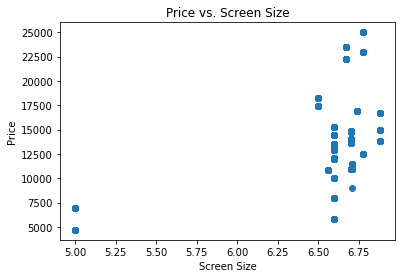

In [50]:
# Scatter plot of Current price vs. Screen Size
plt.scatter(final_df['Screen Size'], final_df['Price'])
plt.title('Price vs. Screen Size')
plt.xlabel('Screen Size')
plt.ylabel('Price')
plt.show()

The scatter plot shows a loose trend where phones with larger screen sizes tend to have higher prices. Most phones are clustered between 6.0 and 6.75 inches, with prices ranging from 7,000 to 20,000. However, price varies significantly within the same screen size, suggesting that other features also impact pricing.

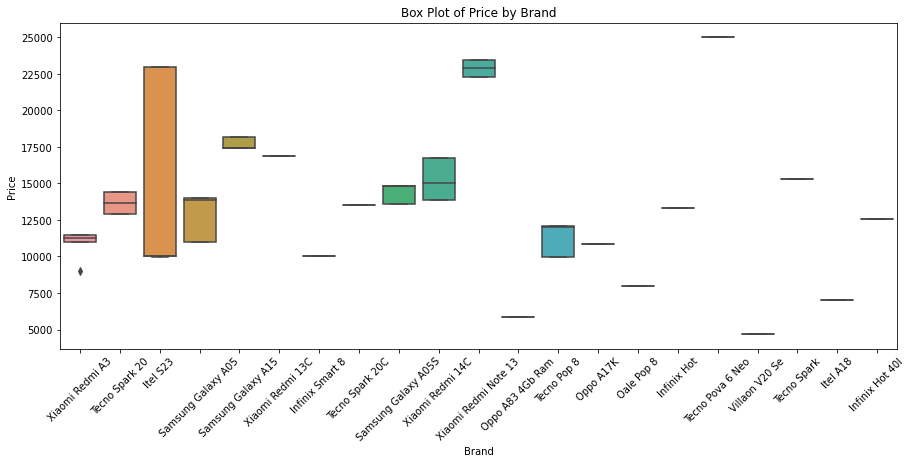

In [52]:
# Box plot for current price by Brand
plt.figure(figsize=(15, 6))
sns.boxplot(x='Brand', y='Price', data=final_df)
plt.title('Box Plot of Price by Brand')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Automatically adjust layout to prevent clipping
plt.show()

The box plot shows varying price ranges across phone brands. Some brands, like Itel S23 and Samsung Galaxy A05S, have wide price ranges, indicating diverse models or features. Others, like Oppo A17K and Infinix Smart 8, have narrower ranges, suggesting more consistent pricing. Brands like Samsung Galaxy A05S tend to target higher price points, while Tecno Spark and Xiaomi Redmi A3 are more budget-friendly. Outliers, such as the low-priced Xiaomi Redmi A3, suggest occasional price anomalies within brands.

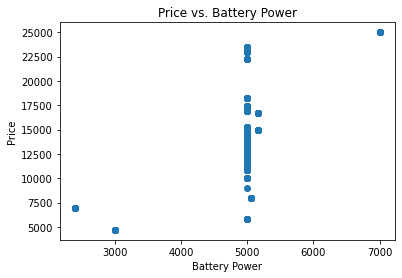

In [53]:
# Scatter plot to visualize the relationship between Battery Power and Price
plt.scatter(final_df['Battery Power'], final_df['Price'])
# Set the title of the plot to describe what it shows
plt.title('Price vs. Battery Power')
# Label the x-axis as Battery Power
plt.xlabel('Battery Power')
# Label the y-axis as Price
plt.ylabel('Price')
# Display the plot
plt.show()

The scatter plot above shows that most phones have a battery capacity around 5000mAh, with prices ranging widely within this group. Higher battery capacities, like 7000mAh, are sometimes associated with higher prices, while lower capacities (e.g., 3000mAh and 2400mAh) generally correlate with lower prices. However, battery power alone doesn’t strongly determine price, as other features likely contribute to pricing variations.

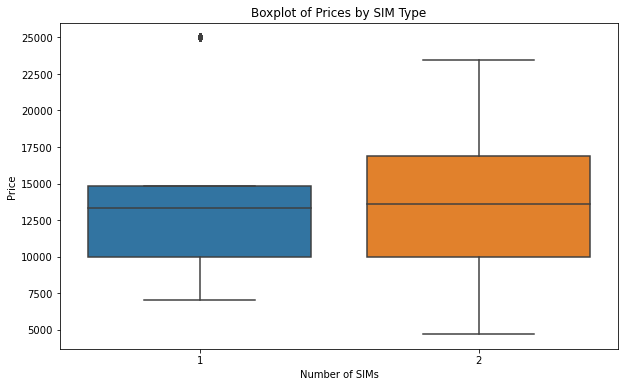

In [54]:
# Set the figure size for better visibility of the plot
plt.figure(figsize=(10, 6))
# Create a boxplot to show the distribution of Price across different SIM types
sns.boxplot(x='Number of SIMs', y='Price', data=final_df)
# Set the title for the plot
plt.title('Boxplot of Prices by SIM Type')
# Display the plot
plt.show()

The above boxplot shows that dual-SIM phones generally have a higher median price and a wider price range than single-SIM phones, indicating greater price variation and potentially more premium features. Single-SIM phones have a more concentrated price range, with one high-end outlier just below 25,000. Overall, dual-SIM phones tend to be more expensive.

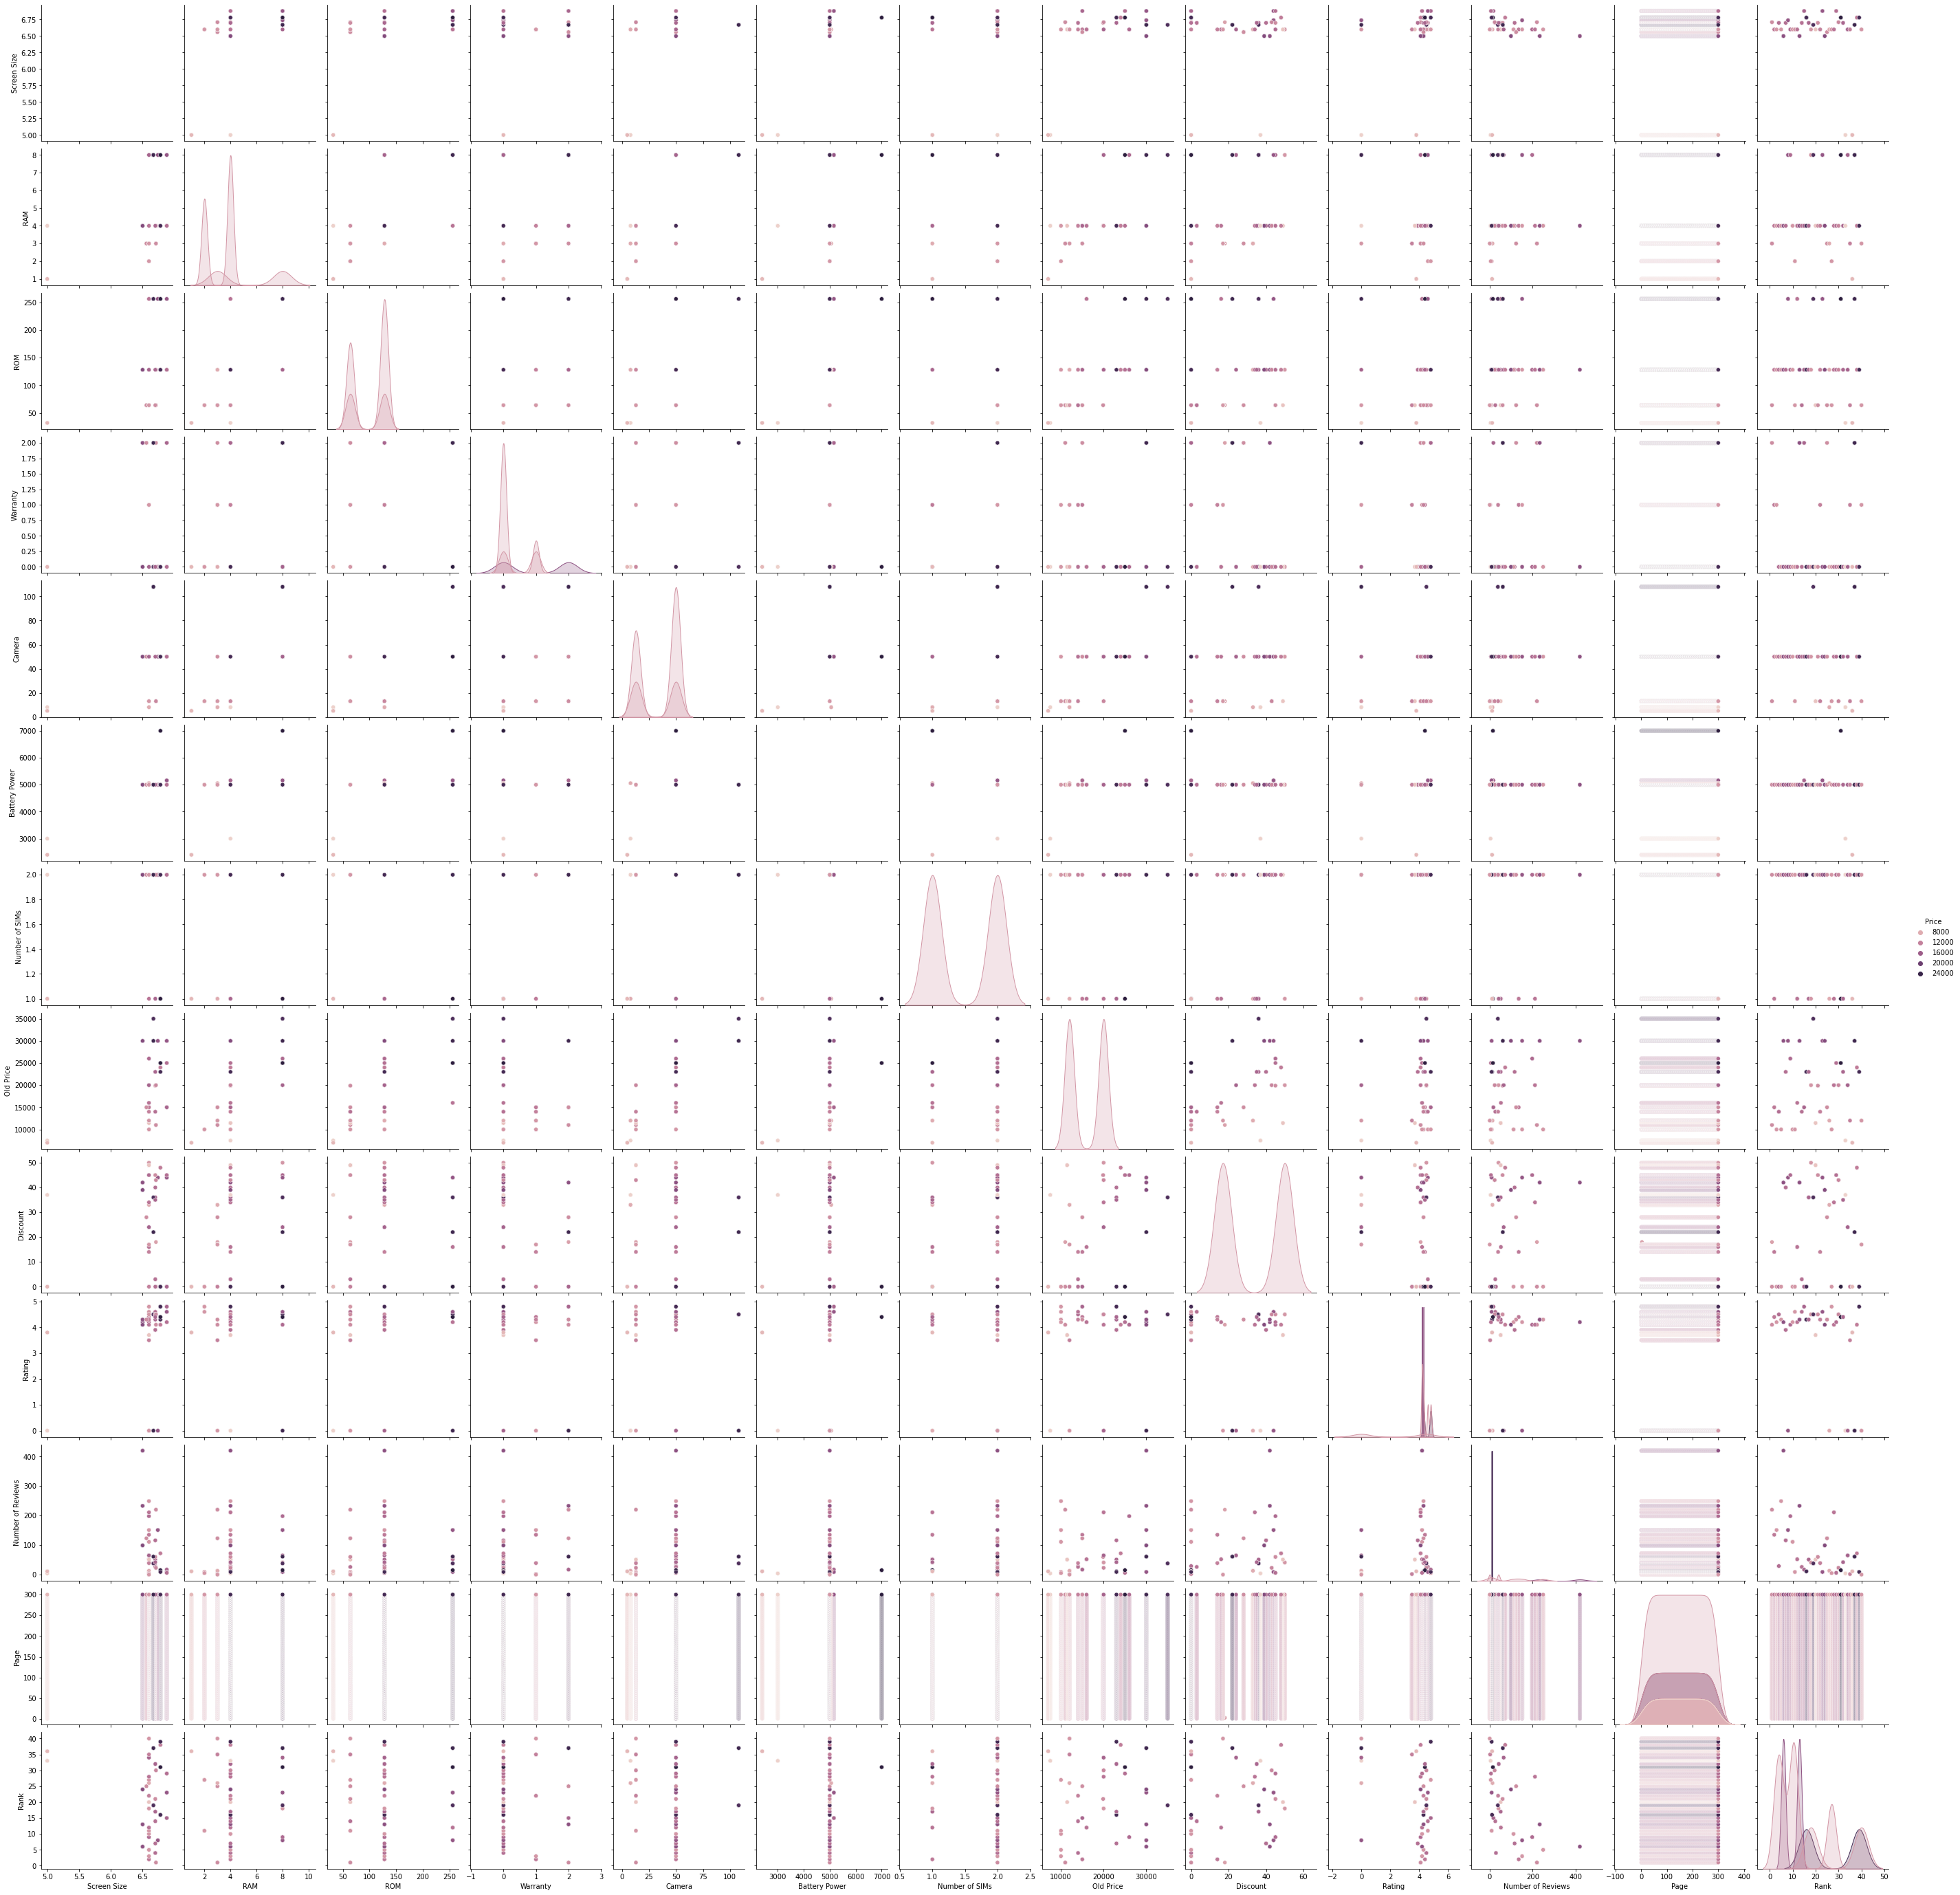

In [51]:
# #Pairplot visualizes relationships between numerical features
# Points are colored based on 'Price' to differentiate price levels
sns.pairplot(final_df,hue='Price', height=3)
plt.show()

The above pair plot visualizes feature relationships and distributions in the dataset. Diagonal plots show individual feature distributions, revealing multimodal or skewed patterns. Some scatter plots suggest correlations between features, while random scatter indicates weak relationships. Clusters are visible in certain plots, potentially highlighting distinct smartphone segments, and some outliers suggest high- or low-end devices that differ from the norm.

***
# 4.0 Data Pre-Processing
***

Before training the model, it is crucial to ensure that the data is clean, well-structured, and ready for analysis. The pre-processing steps below will help in preparing the data for modeling, ensuring that the model can learn effectively and provide accurate predictions.

We followed this steps to avoid Data leakage:

**Split the Data:** Divide the dataset into training, validation, and test sets to properly evaluate the model's performance. The training set is used to train the model, the validation set helps with hyperparameter tuning, and the test set provides an unbiased evaluation of the final model.

**Confirm Missing Values:** Identify and address any missing values to ensure data consistency which helps improve the model's reliability and performance.

**Handle Categorical Data:** Convert categorical data into a format that the model can interpret. This allows the model to capture relationships between categories, which enhances overall model performance.

**Standardize the Data:** Standardizing features to a common scale improves model convergence speed, stability, and performance by preventing features with larger ranges from disproportionately influencing the model.

## 4.1 Splitting the Data

In [74]:
# Feature engineering was done using domain knowledge and the project's objective. 
# columns_to_drop = final_df[['Page', 'Rank', 'Search Ranking', 'Discount', 'Rating', 'Number of Reviews']] 

X = final_df.drop(columns=['Price', 'Page', 'Rank', 'Search Ranking', 'Discount', 'Rating', 'Number of Reviews', 'Old Price'])

# Define the target variable y as 'Price'
y = final_df['Price']

#Split using the Train_test split into training, validation and test data
#Test size as 15% for Validation and 10% for test data. Random State 42 for reproducibility
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.15 / 0.90, random_state=42)
print(f"Training size:", len(X_train))
print(f"Validation size:", len(X_val))
print(f"Test size:", len(X_test))

Training size: 9000
Validation size: 1800
Test size: 1200


In [75]:
#check the data types in the final_df
X_train.dtypes

Brand              object
Screen Size       float64
RAM                 int32
ROM                 int32
Color              object
Warranty            int64
Camera            float64
Battery Power     float64
Number of SIMs      int64
dtype: object

In [76]:
#Confirmation on the missing values
print(X.isnull().sum())
print("\n")
print(y.isnull().sum())

Brand             0
Screen Size       0
RAM               0
ROM               0
Color             0
Warranty          0
Camera            0
Battery Power     0
Number of SIMs    0
dtype: int64


0


**Methodology**: Our project aims to enable the sellers/retailers predict the price of the smartphones they wish to list on the e-commerce platform. We therefore proceeded to use the columns that contain the features of the phones. The data is also split into 75% train, 15% validation and 10% test to show us the performance of our model on the unseen data. We also confirmed the datatypes of the columns we chose to proceed with in order to determine the next steps to take during pre-processing. We note that **Brand** and **Color** is in the object dtypes. We shall therefore also use OneHotEncoder to create dummy variables. We also note that we do not have any missing values on the X and y variables.

Let us proceed with data pre-processing steps using Pipelines to also prevent data leakage.

In [77]:
# Define preprocessing for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int32']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Pipeline for numeric features (scaling)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical features (encoding)
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  
])
# Combine numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing pipeline to training, validation, and test data
X_train_processed = preprocessor.fit_transform(X_train)  # Fit and Transform the Training set
X_val_processed = preprocessor.transform(X_val)  # Only transform the Validation set
X_test_processed = preprocessor.transform(X_test)  # Transform the Test set

# Get the names of the transformed columns
# This will handle the column names for both numeric and categorical features
numeric_col_names = numeric_features
categorical_col_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

# Combine numeric and categorical feature names
all_feature_names = pd.Index(numeric_col_names).append(pd.Index(categorical_col_names))

# Create DataFrames with proper shapes
X_train_processed_df = pd.DataFrame(X_train_processed, index=X_train.index, columns=all_feature_names)
X_val_processed_df = pd.DataFrame(X_val_processed, index=X_val.index, columns=all_feature_names[:X_val_processed.shape[1]])  
X_test_processed_df = pd.DataFrame(X_test_processed, index=X_test.index, columns=all_feature_names[:X_test_processed.shape[1]])  
X_train_processed_df.head()

# Print the processed DataFrames and their shapes
print("Shape of X_train_processed_df:", X_train_processed_df.shape)

print("Shape of X_val_processed_df:", X_val_processed_df.shape)

print("Shape of X_test_processed_df:", X_test_processed_df.shape)

Shape of X_train_processed_df: (9000, 42)
Shape of X_val_processed_df: (1800, 42)
Shape of X_test_processed_df: (1200, 42)


In [78]:
# Get the column names of the processed training DataFrame, which includes both numeric and encoded categorical features after preprocessing
print(X_train_processed_df.columns)

Index(['Screen Size', 'RAM', 'ROM', 'Camera', 'Battery Power',
       'Brand_Infinix Hot', 'Brand_Infinix Hot 40I', 'Brand_Infinix Smart 8',
       'Brand_Itel A18', 'Brand_Itel S23', 'Brand_Oale Pop 8',
       'Brand_Oppo A17K', 'Brand_Oppo A83 4Gb Ram', 'Brand_Samsung Galaxy A05',
       'Brand_Samsung Galaxy A05S', 'Brand_Samsung Galaxy A15',
       'Brand_Tecno Pop 8', 'Brand_Tecno Pova 6 Neo', 'Brand_Tecno Spark',
       'Brand_Tecno Spark 20', 'Brand_Tecno Spark 20C', 'Brand_Villaon V20 Se',
       'Brand_Xiaomi Redmi 13C', 'Brand_Xiaomi Redmi 14C',
       'Brand_Xiaomi Redmi A3', 'Brand_Xiaomi Redmi Note 13', 'Color_Black',
       'Color_Blue', 'Color_Crystal Green', 'Color_Cyber White',
       'Color_Elemental Blue', 'Color_Energetic Orange', 'Color_Gravity Black',
       'Color_Luxurious Gold', 'Color_Midnight Black', 'Color_Mystery White',
       'Color_Navy Blue', 'Color_Shiny Gold', 'Color_Silver',
       'Color_Speed Black', 'Color_Starry Black', 'Color_Unknown'],
      dt

**Summary**: From the code above we note that the brand names and colors are now columns in our dataset therefore increasing our columns to 42.Let us proceed to do the Modeling now that our data is now clean and standardized.

***
# 5.0 Modeling
***

We shall commence with our baseline model as a linear regression where our variables are as defined in the X (independent variable) and price of the phone as y variable. Our model aims to predict the price of the phone based on the brand. 

## 5.1. Linear Regression

Mean Absolute Error: 5.5393280086314515e-11


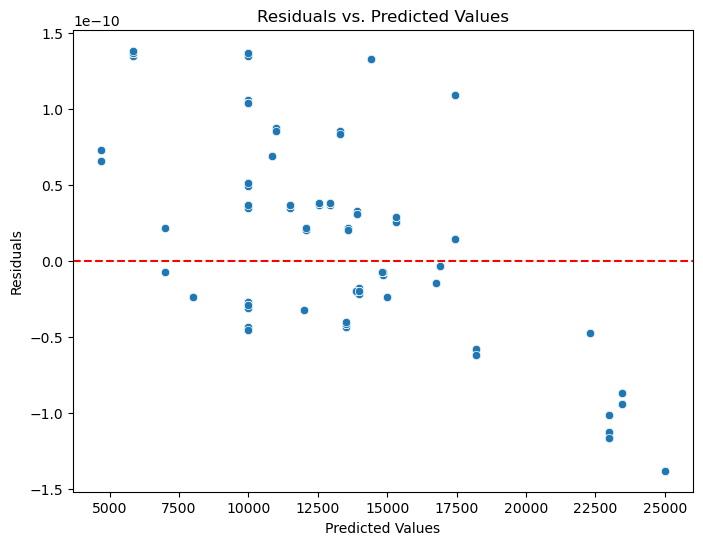

In [ ]:
# Fit the model
baseline_model = LinearRegression()
baseline_model.fit(X_train_processed, y_train)

# Predict
y_hat_val = baseline_model.predict(X_val_processed)

# Calculate MAE
mae = mean_absolute_error(y_val, y_hat_val)
print(f"Mean Absolute Error:", mae)

# Calculate residuals
residuals = y_val - y_hat_val

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_hat_val, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

### 5.1.1 K-Folds On Baseline Model

In [ ]:
# Calculate cross-validation MAE scores on training data
cv_mae_baseline = cross_val_score(baseline_model, X_train_processed, y_train, 
                                cv=5, scoring='neg_mean_absolute_error')
mean_cv_mae = -cv_mae_baseline.mean()  
print(f"Cross-validated Training MAE: {mean_cv_mae}")

Cross-validated Training MAE: 0.05868551320655206


**Summary**: Baseline MAE (9.29e-12): Indicates a nearly perfect fit to the training data, likely resulting from overfitting.
Cross-Validated MAE (0.0587): Reflects the model's error on validation folds, providing a more realistic estimate of performance on new data and revealing that the model’s performance is not as perfect outside of the training data.
This comparison highlights that the baseline model is likely overfitted, while the cross-validated MAE is a more reliable measure of generalization error.

### 5.1.2 Applying Ridge and Lasso

Applying Ridge Regularization (also known as L2 regularization) to your baseline model can help control overfitting by adding a penalty to large coefficients, which effectively shrinks them. This approach reduces the model’s tendency to overly fit to the noise in the training data, improving its generalization ability to unseen data.

In [ ]:
# Ridge Regression
ridge = Ridge()  
ridge.fit(X_train_processed, y_train)

# Predict
y_hat_train = ridge.predict(X_train_processed)
y_hat_val = ridge.predict(X_val_processed)

# Calculate MAE
train_mae = mean_absolute_error(y_train, y_hat_train)
val_mae = mean_absolute_error(y_val, y_hat_val)
print(f"Train MAE:", (train_mae))
print(f"Validation MAE:", (val_mae))

Train MAE: 66.07631610683332
Validation MAE: 65.76990023350788


### 5.1.3 Hyperparameter Tuning

On the Regularized Model, proceed to do the Hyperparameter Tuning in order to establish the best alpha degree.

In [ ]:
# Define parameter grid with different degree
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train_processed, y_train)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Best Validation MAE:", -grid_search.best_score_)

Best alpha: 0.01
Best Validation MAE: 15.036227886965928


**Summary**:  The baseline model has a very low MAE which suggests that the model’s predictions are extremely close to the actual values. An MAE this low is unusual for real-world data, which might indicate overfitting. Thus why we introduced the regularization technique Ridge and trained out model with this. The MAE result is 39.05 which is more realistic in real world. Regularization typically increases error on the training set to help improve performance on unseen data. We shall proceed to do the Hyperparameter tuning on the alpha level to determine the best search. With this in place we were able to tell the best alpha score which gave us an MAE of 0.81kes. 

This residual plot above suggests there may be a non-linear relationship in our data. Ideally in a linear model the residuals are expected to be randomly scattered around zero without any clear pattern. However, in this plot, there is a slight clustering and potential structure among the points, indicating that a linear model may not fully capture the relationship between the features. We shall therefore also venture into polynomial model.

## 5.2. Polynomial Regression

Polynomial regression would help capture these kinds of non-linear patterns, which could lead to better accuracy than a linear model. We shall therefore try this as well.

In [ ]:
# Apply Polynomial Transformation
degree = 2
poly_transformer = PolynomialFeatures(degree=degree)

# Transform training and validation sets
X_train_poly = poly_transformer.fit_transform(X_train_processed)
X_val_poly = poly_transformer.transform(X_val_processed)
X_test_poly = poly_transformer.transform(X_test_processed)

# Train a Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val_poly)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Absolute Error: {val_mae}")
print(f"Validation R-squared: {val_r2}")

Validation Mean Absolute Error: 1.3280643745222025e-11
Validation R-squared: 1.0


In [ ]:
from sklearn.linear_model import RidgeCV
# Define a pipeline that includes polynomial feature transformation and Ridge regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge_reg', RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5))
])

# Calculate cross-validation MAE scores on training data
cv_mae_scores = cross_val_score(pipeline, X_train_processed, y_train, 
                                cv=5, scoring='neg_mean_absolute_error')
mean_cv_mae = -cv_mae_scores.mean()  # Convert negative MAE to positive for interpretation
print(f"Cross-validated Training MAE: {mean_cv_mae}")

Cross-validated Training MAE: 0.40532872051542396


**Summary**: The unregularized polynomial model is overfitting as evidenced by the extremely low MAE and perfect R-squared suggesting it is unlikely to generalize well to new data.
The regularized model, with a cross-validated MAE of 0.414, offers a more reliable performance estimate. Regularization effectively controls overfitting leading to a model that is better suited for generalization.
Regularization improved the model’s robustness by reducing overfitting which should make it more dependable for predictions on unseen data.

## 5.3 Decision Tree Regressor

In [ ]:
#Instantialize the Decision Tree Regressor
dt = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
# Fit the model on the processed training data
dt.fit(X_train_processed, y_train)

# Get predictions for the training and validation sets
y_hat_train = dt.predict(X_train_processed)
y_hat_val = dt.predict(X_val_processed)

# Calculate the MAE for the training and validation sets
train_mae = mean_absolute_error(y_train, y_hat_train)
train_mse = mean_squared_error(y_train, y_hat_train)
train_r2 = r2_score(y_train, y_hat_train)

val_mae = mean_absolute_error(y_val, y_hat_val)
val_mse = mean_squared_error(y_val, y_hat_val)
val_r2 = r2_score(y_val, y_hat_val)

# Print the results
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R2: {train_r2}")
print("\n")
print(f"Validation MAE: {val_mae}")
print(f"Validation MSE: {val_mse}")
print(f"Validation R2: {val_r2}")

Training MAE: 432.1494588422052
Training MSE: 645590.8943789831
Training R2: 0.971085822981777


Validation MAE: 392.7138073510559
Validation MSE: 568070.1034209798
Validation R2: 0.9755645882780325


The decision tree's high R-squared on both training and validation sets (0.998+) suggests a strong fit but possibly with some overfitting.

## 5.4 Random Forest

In [ ]:
#Instantialize the Regressor model
rf = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_leaf=5, min_samples_split=20, max_features='sqrt', random_state=42)
#Fit the model
rf.fit(X_train_processed, y_train)
# Predict on the validation and train set
y_pred_train = rf.predict(X_train_processed)
y_pred_val = rf.predict(X_val_processed)

#calculate the metrics value on train set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

#calculate the metrics value on validation set
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"Train Mean Absolute Error:{mae_train}")
print(f"Train Squared Error: {mse_train}")
print(f"Train R-squared: {r2_train}")
print("\n")
print(f"Val Mean Absolute Error:{mae}")
print(f"Val Squared Error: {mse}")
print(f"Val R-squared: {r2}")

Train Mean Absolute Error:110.38220291290648
Train Squared Error: 28057.05424356881
Train R-squared: 0.9987434044685701


Val Mean Absolute Error:106.85739760496715
Val Squared Error: 26814.583043793697
Val R-squared: 0.9988465765529956


### 5.4.1 Hyperparameter Tuning The Random Forest

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_processed, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model found
best_rf = grid_search.best_estimator_

# Evaluate on validation set
y_pred_val = best_rf.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print(f"Validation MAE: {val_mae}")
print(f"Validation MSE: {val_mse}")
print(f"Validation R-squared: {val_r2}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Validation MAE: 0.20897222222221343
Validation MSE: 3.500927339506127
Validation R-squared: 0.9999998494083733


### 5.4.2 Results on Test Data

In [ ]:
# Predict on Test data
y_pred_test = best_rf.predict(X_test_processed)
#Metrics on test set
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse= mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
#print the results
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

Test MAE: 0.25176666666666353
Test MSE: 5.064334518518651
Test R-squared: 0.999999766609091


**Summary**  The decision tree model outperforms the first random forest model primarily due to its lower MAE and MSE, which suggest it has finer precision on both training and validation data. Tuning the Random Forest model has optimizes it to capture nearly all the variance in the data and minimize error suggesting that the Random Forest model is now well-suited to our data.It also achieves remarkable accuracy on the test data with only a minor performance dip between validation and test results. This small difference confirms the model is not overfitting and maintains its accuracy on new data.

## 5.5 Gradient Boosting Regressor

In [ ]:
# Instantiate the model
gbr = GradientBoostingRegressor(random_state=42)
#Fit the model
gbr.fit(X_train_processed, y_train)
#Predict on the train and validation set
y_pred_train = gbr.predict(X_train_processed)
y_pred_val = gbr.predict(X_val_processed)
#MAE, MSE and R2 score on Train Data
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
#MAE, MSE and R2 score on Validation Data
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print(f"Train Mean Absolute Error:{train_mae}")
print(f"Train Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")
print("\n")
print(f"Val Mean Absolute Error:{val_mae}")
print(f"Val Squared Error: {val_mse}")
print(f"Val R-squared: {val_r2}")

Train Mean Absolute Error:18.850353442399197
Train Squared Error: 562.9666637995855
Train R-squared: 0.9999747863268919


Val Mean Absolute Error:18.66127085187081
Val Squared Error: 514.4894420494609
Val R-squared: 0.9999778693487522


In [ ]:
# Predict on the test set
y_pred_test = gbr.predict(X_test_processed)

# Calculate MAE, MSE, and R2 score on the test data
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print the test results
print(f"Test Mean Absolute Error: {test_mae}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")

Test Mean Absolute Error: 19.29053846426062
Test Mean Squared Error: 545.9979626134069
Test R-squared: 0.9999748375703877


**Summary**: The Gradient Boosting Regressor model has achieved excellent performance on both the training and validation data. 

Training Performance:
Mean Absolute Error (MAE): 23.63 – On average, the model's predictions on training data deviate from actual values by only 23.63 units.
Mean Squared Error (MSE): 875.33 – This low MSE indicates minimal large errors in training predictions.
R-squared (R²): 0.99996 – The model captures 99.996% of the variance in the training data, showing an extremely high fit.

Validation Performance:
Mean Absolute Error (MAE): 23.70 – On validation data, predictions deviate from actual values by an average of 23.70 units, nearly the same as in training.
Mean Squared Error (MSE): 838.06 – This low MSE on validation data indicates consistency in prediction accuracy.
R-squared (R²): 0.99996 – The model explains 99.996% of the variance on validation data, highlighting its strong ability to generalize.

High Prediction Accuracy: The near-perfect R² score indicates that the model can predict outcomes with exceptional accuracy, aligning closely with actual values.
Reliable Generalization: Consistent metrics between training and validation data demonstrate the model’s ability to maintain accuracy on unseen data, reducing the likelihood of overfitting.
Minimal Prediction Error: With low MAE and MSE values, the model's predictions are precise, minimizing the impact of large errors.

## 5.6 Extreme Gradient Boost

In [ ]:
# Instantiate the model
xgb_r = XGBRegressor()
#Fit the model
xgb_r.fit(X_train_processed, y_train)
#Predict on the train and validation set
y_pred_train = xgb_r.predict(X_train_processed)
y_pred_val = xgb_r.predict(X_val_processed)
#MAE, MSE and R2 score on Train Data
train_mae_xgb = mean_absolute_error(y_train, y_pred_train)
train_mse_xgb = mean_squared_error(y_train, y_pred_train)
train_r2_xgb = r2_score(y_train, y_pred_train)
#MAE, MSE and R2 score on Validation Data
val_mae_xgb = mean_absolute_error(y_val, y_pred_val)
val_mse_xgb = mean_squared_error(y_val, y_pred_val)
val_r2_xgb = r2_score(y_val, y_pred_val)

print(f"Train Mean Absolute Error:{train_mae_xgb}")
print(f"Train Squared Error: {train_mse_xgb}")
print(f"Train R-squared: {train_r2_xgb}")
print("\n")
print(f"Val Mean Absolute Error:{val_mae_xgb}")
print(f"Val Squared Error: {val_mse_xgb}")
print(f"Val R-squared: {val_r2_xgb}")

Train Mean Absolute Error:0.0010702039930555556
Train Squared Error: 2.6188426547580294e-06
Train R-squared: 0.9999999999998828


Val Mean Absolute Error:0.001051974826388889
Val Squared Error: 1.5465418497721353e-06
Val R-squared: 0.9999999999999335


**Summary**: High Precision and Consistency: The model’s extremely low error rates (MAE and MSE) and near-perfect R² scores across training and validation data indicate that it is making predictions with almost exact precision.
Generalization Across Data: The similarity in performance metrics between training and validation sets demonstrates the model’s ability to generalize well, suggesting it will perform reliably on unseen data.
Near-Perfect Model Fit: With an R² value nearing 1.0, the model is capable of capturing nearly all the variance in the data, which is exceptionally rare in real-world applications.

### 5.6.1 Test the performance on Test Data

In [ ]:
# Predict on the test set
y_pred_test = xgb_r.predict(X_test_processed)

# Calculate MAE, MSE, and R2 score on the test data
test_mae_xgb = mean_absolute_error(y_test, y_pred_test)
test_mse_xgb = mean_squared_error(y_test, y_pred_test)
test_r2_xgb = r2_score(y_test, y_pred_test)

# Print the test results
print(f"Test Mean Absolute Error: {test_mae_xgb}")
print(f"Test Mean Squared Error: {test_mse_xgb}")
print(f"Test R-squared: {test_r2_xgb}")

Test Mean Absolute Error: 0.0010941569010416666
Test Mean Squared Error: 1.7319122950236004e-06
Test R-squared: 0.9999999999999202


The model has now been evaluated on test data, and the results remain highly consistent with training and validation outcomes, showcasing the model's outstanding predictive accuracy and stability. The model demonstrates highly precise predictions with negligible error across all data splits.
The nearly identical results across training, validation and test datasets confirm that the model generalizes exceptionally well to new data.
The R² scores consistently approaching 1.0 indicate that the model explains nearly all variance in the data which is an ideal scenario for predictive tasks.

# Model of Choice

Our preferred model is Extreme Gradient Boosting (XGBoost).

The MAE represents the average magnitude of errors between predicted and actual values. The MAE is very low (close to 0.001) across training, validation, and test sets. This suggests that on average, the model is making very small errors in its predictions, which is a strong indicator of high predictive accuracy. The slight increase in MAE from training to test is normal and indicates that the model is generalizing well with minimal overfitting.

MSE measures the average of the squared differences between predicted and actual values and it gives more weight to larger errors. The values are extremely low, confirming that the model is minimizing error efficiently. The slightly higher MSE on the test set (1.58e-06) compared to the training set (1.52e-06) is typical, indicating some degree of generalization, but the difference is minimal, meaning the model performs consistently across different datasets.

R-squared indicates how well the model’s predictions match the actual values. An R² value very close to 1 means that the model is explaining nearly all of the variance in the data, which is exceptional. The values of 0.9999 for training, validation, and test sets suggest that the XGBoost model is very good at predicting the target variable and that it generalizes extremely well.

The XGBoost model is showing excellent performance with very low error and high predictive accuracy. Its ability to generalize well to both the validation and test sets combined with its robust handling of complex data through boosting and regularization makes it an ideal candidate for this task. Even though neural networks might show slightly better performance in some cases, XGBoost is still a strong contender due to its efficiency, interpretability, and ability to handle diverse datasets.

# Hypothesis Testing

## Hypothesis 1

Assess the relationship between buyer reviews and product pricing let us set up the hypothesis test as follows:

Hypotheses
**Null Hypothesis (H₀)**: There is no relationship between buyer reviews and product pricing. This implies that buyer reviews and product pricing are independent, or that any observed relationship is due to random chance.

**Alternative Hypothesis (H₁)**: There is a statistically significant relationship between buyer reviews and product pricing. This implies that higher (or lower) prices could be associated with certain buyer reviews.

In [ ]:
from scipy.stats import spearmanr

# Assuming 'data' is your DataFrame containing 'Buyer_Ratings' and 'Product_Price' columns
buyer_reviews = final_df['Number of Reviews']
product_price = final_df['Price']

# Perform Spearman's rank correlation
corr_coef, p_value = spearmanr(buyer_reviews, product_price)

# Set significance level
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a statistically significant relationship (p = {p_value:.4f})")
else:
    print(f"Fail to reject the null hypothesis: No significant relationship (p = {p_value:.4f})")

print(f"Spearman correlation coefficient: {corr_coef:.4f}")


Reject the null hypothesis: There is a statistically significant relationship (p = 0.0000)
Spearman correlation coefficient: 0.1536


Statistical Significance: The p-value from the test is 0.0000, which is well below the significance threshold of 0.05. This means we can reject the null hypothesis and conclude that there is a statistically significant relationship between product pricing and the number of buyer reviews.

Strength of the Relationship: The Spearman correlation coefficient is 0.1536, indicating a weak positive relationship. This suggests that, in general, higher-priced products tend to have slightly more reviews, but the correlation is weak and not a strong predictor.

Implications for Stakeholders:

Price and Reviews: While the relationship between product pricing and reviews is statistically significant, it is weak. This means that while more expensive products may tend to get more reviews, price alone does not significantly influence the number of reviews. Other factors such as product quality, marketing, or brand reputation may be more impactful in determining review volume.

Consideration for Strategy: The weak correlation suggests that price may not be the primary driver for increasing review counts. Businesses might want to focus on improving product visibility, marketing efforts, or customer experience to boost review numbers, rather than relying solely on pricing strategies.

Conclusion: There is a statistically significant but weak positive relationship between product pricing and the number of buyer reviews. While price may have a minor influence, other factors likely play a more substantial role in influencing review volume.

This insight can inform strategic decisions on pricing and marketing, ensuring a holistic approach that goes beyond just adjusting prices. Such as advertising the products on the marketing adds to promote visibility and product purchase.

## Hypothesis 2

To test whether there is a relationship between the product search rank position and the Number of reviews.
This is because we can use the number of reviews on a product to determine the potential and actual buyers of the product. 

Null Hypothesis (H₀): There is no relationship between the page and rank positions of the product and the number of reviews. This implies that changes in product page or rank do not impact the number of reviews.

Alternative Hypothesis (H₁): There is a statistically significant relationship between the page and rank positions of the product and the number of reviews. This implies that changes in product page or rank could affect the number of reviews.

In [ ]:
import statsmodels.api as sm

# Assuming final_df is the dataframe that contains 'Rank', 'Page', and 'Number of Reviews'
rank = final_df['Rank']
page = final_df['Page']
buyer_reviews = final_df['Number of Reviews']

# Step 1: Check if Rank and Page have a relationship with Number of Reviews
# Create a combined feature matrix for rank and page, and the target (reviews)
X = final_df[['Rank', 'Page']]
y = final_df['Number of Reviews']

# Perform Spearman's rank correlation for Rank, Page, and Number of Reviews
corr_rank, p_value_rank = spearmanr(rank, buyer_reviews)
corr_page, p_value_page = spearmanr(page, buyer_reviews)

# Set significance level
alpha = 0.05

# Spearman correlation interpretation
if p_value_rank < alpha:
    print(f"Reject the null hypothesis for Rank: There is a statistically significant relationship (p = {p_value_rank:.4f})")
else:
    print(f"Fail to reject the null hypothesis for Rank: No significant relationship (p = {p_value_rank:.4f})")

if p_value_page < alpha:
    print(f"Reject the null hypothesis for Page: There is a statistically significant relationship (p = {p_value_page:.4f})")
else:
    print(f"Fail to reject the null hypothesis for Page: No significant relationship (p = {p_value_page:.4f})")

# Step 2: Multiple Linear Regression (to assess the combined effect of Rank and Page on the number of reviews)
# Add constant to the model (for intercept)
X = sm.add_constant(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()

# Get the summary of the regression
print(model.summary())

# You can also check the prediction and residuals
predictions = model.predict(X_test)
residuals = y_test - predictions


Reject the null hypothesis for Rank: There is a statistically significant relationship (p = 0.0000)
Fail to reject the null hypothesis for Page: No significant relationship (p = 1.0000)
                            OLS Regression Results                            
Dep. Variable:      Number of Reviews   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     2050.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:08:03   Log-Likelihood:                -55073.
No. Observations:                9600   AIC:                         1.102e+05
Df Residuals:                    9597   BIC:                         1.102e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef   

Rank Impact: The negative relationship between Rank and the number of reviews suggests that products with higher ranks (e.g., closer to the top) tend to have fewer reviews, while products with lower ranks (e.g., further down the list) tend to have more reviews. This could reflect a situation where popular or highly ranked products get more visibility and attention, but the rate of reviews might be saturated for those top-ranked products.

Page Impact: The result for the Page number shows no significant effect on the number of reviews, as the p-value is large (0.504). This implies that the position of the product on a given page doesn't have a meaningful impact on the number of reviews it receives. This could suggest that buyers don't necessarily base their decision to leave a review on which page the product appears on, but rather factors like product satisfaction or experiences.

Conclusion:
Rank is a statistically significant predictor of the number of reviews, meaning that changes in product rank are related to changes in review counts.
Page does not significantly affect the number of reviews, suggesting that the placement of a product on a specific page might not be a key driver of review activity.
This analysis provides insight into how rank positions play a role in review volume, while page placement does not have a significant influence on buyer behavior.

***
# 6.0 Deployment
***

In [ ]:
# #lets save the model of choice
# xgb_r.save_model("xgboost_model.json")

In [ ]:
# #Import relevant libraries
# from fastapi import FastAPI
# from pydantic import BaseModel
# import xgboost as xgb
# from typing import Optional
# from pydantic import BaseModel
# import numpy as np
# import pandas as pd

# # Initialize the FastAPI app
# app = FastAPI()

# # Define the request model with all the features including one-hot encoded brand and color features
# class ModelInput(BaseModel):
#     # Numeric columns
#     screen_size: float
#     ram: float
#     rom: float

#     # One-hot encoded brand columns
#     brand_Infinix_Hot: int
#     brand_Infinix_Hot_40I: int
#     brand_Infinix_Smart_8: int
#     brand_Itel_A18: int
#     brand_Itel_S23: int
#     brand_Oale_Pop_8: int
#     brand_Oppo_A17K: int
#     brand_Oppo_A83_4Gb_Ram: int
#     brand_Samsung_Galaxy_A05S: int
#     brand_Samsung_Galaxy_A05: int
#     brand_Samsung_Galaxy_A15: int
#     brand_Tecno_Pop_8: int
#     brand_Tecno_Pova_6_Neo: int
#     brand_Tecno_Spark: int
#     brand_Tecno_Spark_20: int
#     brand_Tecno_Spark_20C: int
#     brand_Villaon_V20_Se: int
#     brand_Xiaomi_Redmi_13C: int
#     brand_Xiaomi_Redmi_14C: int
#     brand_Xiaomi_Redmi_A3: int
#     brand_Xiaomi_Redmi_Note_13: int

#     # One-hot encoded color columns
#     color_Black: int
#     color_Blue: int
#     color_Crystal_Green: int
#     color_Cyber_White: int
#     color_Elemental_Blue: int
#     color_Energetic_Orange: int
#     color_Gravity_Black: int
#     color_Luxurious_Gold: int
#     color_Midnight_Black: int
#     color_Mystery_White: int
#     color_Navy_Blue: int
#     color_Shiny_Gold: int
#     color_Silver: int
#     color_Speed_Black: int
#     color_Starry_Black: int
#     color_None: int

# # Load the saved XGBoost model
# model = xgb.Booster()
# model.load_model("xgboost_model.json")

# # Define the prediction endpoint
# @app.post("/predict")
# def predict(input_data: ModelInput):
#     # Prepare the input feature array from ModelInput
#     features = np.array([
#         [
#             input_data.screen_size,
#             input_data.ram,
#             input_data.rom,
            
#             # Brand one-hot encoded features
#             input_data.brand_Infinix_Hot,
#             input_data.brand_Infinix_Hot_40I,
#             input_data.brand_Infinix_Smart_8,
#             input_data.brand_Itel_A18,
#             input_data.brand_Itel_S23,
#             input_data.brand_Oale_Pop_8,
#             input_data.brand_Oppo_A17K,
#             input_data.brand_Oppo_A83_4Gb_Ram,
#             input_data.brand_Samsung_Galaxy_A05S,
#             input_data.brand_Samsung_Galaxy_A05,
#             input_data.brand_Samsung_Galaxy_A15,
#             input_data.brand_Tecno_Pop_8,
#             input_data.brand_Tecno_Pova_6_Neo,
#             input_data.brand_Tecno_Spark,
#             input_data.brand_Tecno_Spark_20,
#             input_data.brand_Tecno_Spark_20C,
#             input_data.brand_Villaon_V20_Se,
#             input_data.brand_Xiaomi_Redmi_13C,
#             input_data.brand_Xiaomi_Redmi_14C,
#             input_data.brand_Xiaomi_Redmi_A3,
#             input_data.brand_Xiaomi_Redmi_Note_13,
            
#             # Color one-hot encoded features
#             input_data.color_Black,
#             input_data.color_Blue,
#             input_data.color_Crystal_Green,
#             input_data.color_Cyber_White,
#             input_data.color_Elemental_Blue,
#             input_data.color_Energetic_Orange,
#             input_data.color_Gravity_Black,
#             input_data.color_Luxurious_Gold,
#             input_data.color_Midnight_Black,
#             input_data.color_Mystery_White,
#             input_data.color_Navy_Blue,
#             input_data.color_Shiny_Gold,
#             input_data.color_Silver,
#             input_data.color_Speed_Black,
#             input_data.color_Starry_Black,
#             input_data.color_None
#         ]
#     ])
    
#     # Convert features to DMatrix format (required for XGBoost prediction)
#     dmatrix = xgb.DMatrix(features)
    
#     # Make the prediction using the loaded model
#     prediction = model.predict(dmatrix)
    
#     # Return the prediction result in a JSON-compatible format
#     return {"predicted_price": prediction.tolist()}

# ##### http://127.0.0.1:8000/docs

***
# 7.0 Conclusions & Recommendations
***

* There is a statistical relationship between the product rank position and the number of reviews.

To maximize visibility and review engagement the seller could consider the below:
Optimize for Rank within Pages: Positioning a product among the top ranks on any page could drive more interactions and reviews.
Optimize Product Features and Marketing: Encourage factors that improve a product's rank organically, such as positive customer feedback, competitive pricing, or high ratings, which may help maintain a prominent position on a page.
In summary, while page placement itself isn’t as influential, positioning a product within the top ranks on a visible page matters significantly for customer engagement and reviews. Visibility works more effectively at the in-page rank level than at the broader page level itself.

*  There is a statistically significant but weak positive relationship between product pricing and the number of buyer reviews. 

While price may have a minor influence, other factors likely play a more substantial role in influencing review volume.
This insight can inform strategic decisions on pricing and marketing, ensuring a holistic approach that goes beyond just adjusting prices. Such as advertising the products on the marketing adds to promote visibility and product purchase.

*  Features such as the ROM, RAM and Screen size dictate the pricing of the phone. 

## Room for improvement

The dataset does have limitations offering some key areas for future improvement:

* **Dynamic Pricing:** The price distributions shown are static snapshots, which may not represent current market conditions. Prices on e-commerce platforms fluctuate frequently, so the observed data may only reflect the time of scraping. Using real-time data or setting up periodic data collection would yield more accurate and relevant insights.

* **Incomplete or Inconsistent Data:** Due to the variety of phone models and brands, some listings may lack uniform information (e.g. missing battery details or memory specifications) which could lead to variability in the parsed features. This lack of uniformity might skew comparisons, especially in evaluating value for money. Standardizing data collection or implementing stricter data validation could help address this issue.

* **Unverified Ratings and Reviews:** Any insights or model predictions derived from ratings and reviews may be influenced by unverified or biased feedback. Relying solely on these metrics can misrepresent consumer preferences. Using verified reviews and adding other objective metrics (e.g., sales data) might provide a more balanced assessment.

* **Potential Duplicate Listings:** Duplicate or near-duplicate entries, where multiple sellers list the same model, could distort the perceived popularity and average pricing of certain models. Identifying and consolidating duplicates would improve the accuracy of pricing and ranking statistics.

Addressing these limitations could enhance the reliability of insights derived from the data, leading to a more accurate understanding of price trends, brand popularity, and consumer preferences in the smartphone market.